In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Set seed for reproducibility
np.random.seed(234)

In [2]:
# Create synthetic dataset
students = 40
study_hours = np.random.randint(1, 10, students) # 1 to 9 hours study
job_hours = np.random.randint(0, 15, students)  # 0 to 14 hours job
sleep_hours = np.random.randint(4, 9, students) # 4 to 8 hours sleep
extracurricular = np.random.randint(0, 6, students) # 0 to 5 hrs activities

# Exam score: positively influenced by study & sleep negatively by job and extra curricular activities
exam_score = (40
              +5*study_hours #strong positive
              +2*sleep_hours  # mild positive
              -3*job_hours  # strong negative
              -1*extracurricular    # mild negative
              + np.random.randint(-5,5, students)   #noise            
              )

data = pd.DataFrame({
    'Study Hours': study_hours,
    'Job Hours': job_hours,
    'Sleep Hours': sleep_hours,
    'Extracurricular Hours': extracurricular,
    'Exam Score': exam_score
})

In [3]:
# Print the dataset
data.head()

,Study Hours,Job Hours,Sleep Hours,Extracurricular Hours,Exam Score
0,9,10,4,2,56
1,5,9,5,1,46
2,2,0,6,3,57
3,4,10,6,5,37
4,8,8,7,1,69


In [4]:
# Computing the correlation co-eff for each data feature
corr_efficients = data.corr()
corr_efficients

,Study Hours,Job Hours,Sleep Hours,Extracurricular Hours,Exam Score
Study Hours,1.000000,-0.136551,-0.006383,-0.114442,0.694048
Job Hours,-0.136551,1.000000,0.188992,0.209991,-0.782525
Sleep Hours,-0.006383,0.188992,1.000000,0.158029,-0.035653
Extracurricular Hours,-0.114442,0.209991,0.158029,1.000000,-0.276837
Exam Score,0.694048,-0.782525,-0.035653,-0.276837,1.000000


In [5]:
data.columns

Index(['Study Hours', 'Job Hours', 'Sleep Hours', 'Extracurricular Hours',
       'Exam Score'],
      dtype='object')

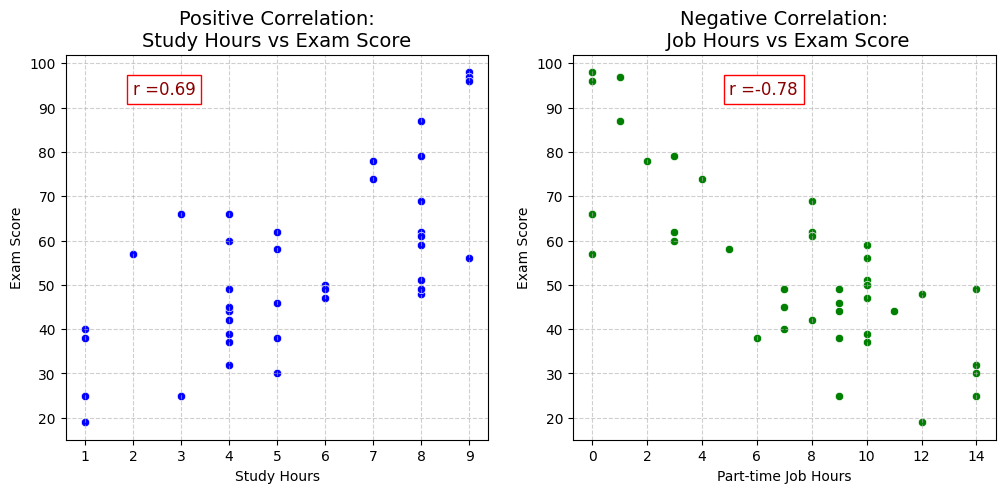

In [6]:
# Compute correlation matrix first (this defines 'corr')
corr =data[['Study Hours', 'Job Hours', 'Exam Score']].corr()

# Plot: Positive and Negative examples
plt.figure(figsize=(12,5))

# Positive correlation: Study vs Score
plt.subplot(1,2,1)
sns.scatterplot(x='Study Hours', y='Exam Score', data=data, color='blue')
plt.title('Positive Correlation:\nStudy Hours vs Exam Score', fontsize=14)
plt.xlabel('Study Hours')
plt.ylabel('Exam Score')
plt.text(2, max(data['Exam Score'])-5,
         f'r ={corr.loc['Study Hours', 'Exam Score']:.2f}',
         fontsize=12, color='darkred',
         bbox=dict(facecolor='white', edgecolor='red'))
plt.grid(True, linestyle='--', alpha=0.6)


# Negative Correlation: Job vs Exams
plt.subplot(1,2,2)
sns.scatterplot(x='Job Hours', y='Exam Score', data=data, color='green')
plt.title('Negative Correlation:\n Job Hours vs Exam Score', fontsize=14)
plt.xlabel('Part-time Job Hours')
plt.ylabel('Exam Score')
plt.text(5, max(data['Exam Score'])-5,
        f'r ={corr.loc['Job Hours', 'Exam Score']:.2f}',
        fontsize=12, color='darkred',
        bbox=dict(facecolor='white', edgecolor='red'))
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout
plt.show()

In [7]:
# predictions = model.predict(X)

In [8]:
data.head()

,Study Hours,Job Hours,Sleep Hours,Extracurricular Hours,Exam Score
0,9,10,4,2,56
1,5,9,5,1,46
2,2,0,6,3,57
3,4,10,6,5,37
4,8,8,7,1,69


**Simple Linear Regression (SLR)**

We want to see how study hours affect exam scores using Simple Linear Regression.

In [9]:
data.head()

,Study Hours,Job Hours,Sleep Hours,Extracurricular Hours,Exam Score
0,9,10,4,2,56
1,5,9,5,1,46
2,2,0,6,3,57
3,4,10,6,5,37
4,8,8,7,1,69


In [10]:
import statsmodels.api as sm

#Define variable for simple regression
X = data['Study Hours']
Y = data['Exam Score']

In [11]:
# Add intercept (constant term)
X = sm.add_constant(X)
X.head()

,const,Study Hours
0,1.0,9
1,1.0,5
2,1.0,2
3,1.0,4
4,1.0,8


In [12]:
# Fit model using OLS (ordinary Least Squares)
model = sm.OLS(Y, X).fit()

# Display summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Exam Score   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     35.32
Date:                Tue, 07 Oct 2025   Prob (F-statistic):           6.82e-07
Time:                        14:00:45   Log-Likelihood:                -161.99
No. Observations:                  40   AIC:                             328.0
Df Residuals:                      38   BIC:                             331.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          24.6404      5.476      4.500      

C:\Users\ncc84\AppData\Local\Temp\ipykernel_16180\3821536756.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(2, max(data['Exam Score'])-5, f'Y={model.params[0]:.2f} + {model.params[1]:.2f}X', color='red', fontsize=12)


<function matplotlib.pyplot.show(close=None, block=None)>

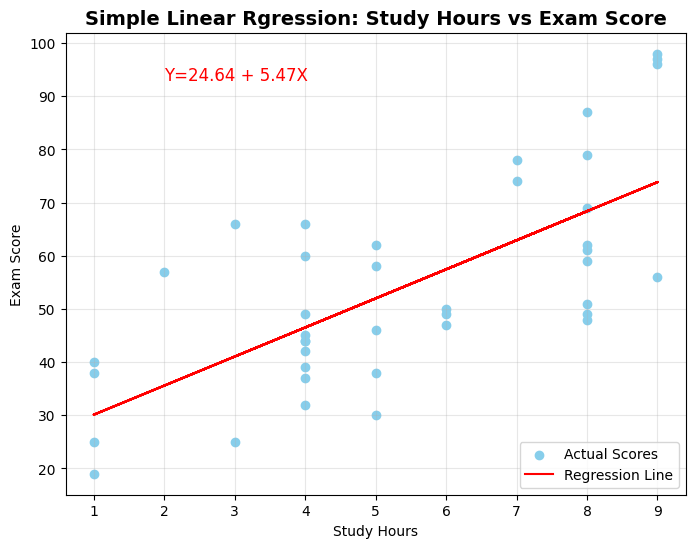

In [13]:
# Lets have the regression plot using regression line and scatter plot
plt.figure(figsize=(8,6))
plt.scatter(data['Study Hours'], data['Exam Score'], color='skyblue', label='Actual Scores')
plt.plot(data['Study Hours'], model.predict(X), color='red', label='Regression Line')

# Annotate
plt.title('Simple Linear Rgression: Study Hours vs Exam Score', fontsize=14, weight='bold')
plt.xlabel('Study Hours')
plt.ylabel('Exam Score')
plt.text(2, max(data['Exam Score'])-5, f'Y={model.params[0]:.2f} + {model.params[1]:.2f}X', color='red', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show

